In [1]:
import numpy as np
from matplotlib import pyplot as plt
from ast import literal_eval
from scipy import spatial

In [3]:
def open_file(filename):
    with open(filename, 'r') as file:
        data = literal_eval('[' + ''.join(file.readlines()) + ']')

    num_cells = 80

    pos_ps = np.array(data).reshape(int(len(data)/(num_cells*2)),num_cells,2)
    return pos_ps

data1 = [open_file(f'0/data{i}.txt') for i in range(10)]
data2 = [open_file(f'16_200/data{i}.txt') for i in range(10)]
data3 = [open_file(f'64_200/data({i}).txt') for i in range(10)]

In [4]:
def calculate_speed(data):
    speed_matrix = np.zeros((data.shape[1] , data.shape[0]-1))
    for row in range(len(data)-1):
        for count, col in enumerate(data[row]):
            if spatial.distance.euclidean(col, data[row+1,count]) > 100:
                speed_matrix[count,row] = 0.3
            else:
                speed_matrix[count,row] = spatial.distance.euclidean(col, data[row+1,count])

    return speed_matrix


def calculate_average_speed(data):
    average_array = []
    for i in range(len(data[0])):
        average_array.append(sum(data[:,i])/len(data[0]))
    return average_array

def smooth_curve(data, n):
    smooth_array = []
    for i in range(len(data)):
        if i >= len(data)-n and i != len(data) - 1:
            left = len(data) - i - 1
            smooth_array.append(sum(data[i:i+left])/left)
        elif i == len(data) - 1:
             smooth_array.append(data[i])
        else:
            smooth_array.append(sum(data[i:i+n])/n)
    return smooth_array


def density_calculation(data, distance=10, measure_points=10):
    density = []

    for i in range(measure_points,len(data)):
        if i % measure_points == 0:
            last_seen = i
    for count, row in enumerate(data):
        if count % measure_points == 0:
            step_density = []
            for point1 in row:
                neighbor_count = -1
                for point2 in row:
                    if spatial.distance.euclidean(point1, point2) < distance:
                        neighbor_count += 1
                step_density.append(neighbor_count)
            density.append(sum(step_density)/len(step_density))
    return density


In [5]:
speed_data1 = [calculate_speed(data1[i]) for i in range(10)]
average_speed1 = [calculate_average_speed(speed_data1[i]) for i in range(10)]
smooth1 = [smooth_curve(average_speed1[i], 50) for i in range(10)]

In [6]:
speed_data2 = [calculate_speed(data2[i]) for i in range(10)]
average_speed2 = [calculate_average_speed(speed_data2[i]) for i in range(10)]
smooth2 = [smooth_curve(average_speed2[i], 50) for i in range(10)]

In [7]:
speed_data3 = [calculate_speed(data3[i]) for i in range(10)]
average_speed3 = [calculate_average_speed(speed_data3[i]) for i in range(10)]
smooth3 = [smooth_curve(average_speed3[i], 50) for i in range(10)]

In [83]:
def average_all_runs(data):
    average_all = []
    for i in range(len(data[0])):
        summation = 0
        for x in range(len(data)):
            summation += data[x][i]
        average_all.append(summation/len(data))
    return average_all

def std_all_runs(data):
    std_all = np.std(data, axis = 0)
    return std_all

In [84]:
all_average1 = average_all_runs(average_speed1)
smooth_all1 = np.array(smooth_curve(all_average1, 10))
all_std1 = std_all_runs(average_speed1)
smooth_std1 = np.array(smooth_curve(all_std1, 10))

In [85]:
all_average2 = average_all_runs(average_speed2)
smooth_all2 = np.array(smooth_curve(all_average2, 10))
all_std2 = std_all_runs(average_speed2)
smooth_std2 = np.array(smooth_curve(all_std2, 10))

In [86]:
all_average3 = average_all_runs(average_speed3)
smooth_all3 = np.array(smooth_curve(all_average3, 10))
all_std3 = std_all_runs(average_speed3)
smooth_std3 = np.array(smooth_curve(all_std3, 10))

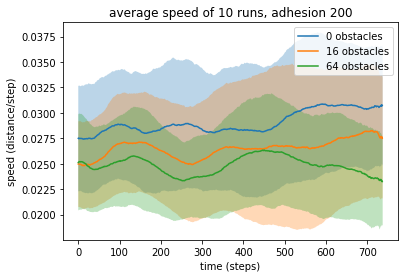

In [93]:
# plt.plot(all_average1)
fig = plt.figure(figsize = (12, 10))
plt.plot(smooth_all1[:-10], label='0 obstacles')

plt.fill_between(np.linspace(0, 737, 737), smooth_all1[:-10]-smooth_std1[:-10], smooth_all1[:-10]+smooth_std1[:-10], alpha = 0.3)
# plt.plot(all_average2)
plt.plot(smooth_all2[:-10], label='16 obstacles')
plt.fill_between(np.linspace(0, 737, 737), smooth_all2[:-10]-smooth_std2[:-10], smooth_all2[:-10]+smooth_std2[:-10], alpha = 0.3)

plt.plot(smooth_all3[:-10], label='64 obstacles')
plt.fill_between(np.linspace(0, 737, 737), smooth_all3[:-10]-smooth_std3[:-10], smooth_all3[:-10]+smooth_std3[:-10], alpha = 0.3)

plt.title('average speed of 10 runs, adhesion 200')
plt.xlabel('time (steps)')
plt.ylabel('speed (distance/step)')
plt.legend()

In [88]:
densities_average1 = [density_calculation(data1[i], 50, 10) for i in range(10)]
density_all1 = np.array(average_all_runs(densities_average1))
density_std1 = np.array(std_all_runs(densities_average1))
#smooth_std1 = np.array(smooth_curve(density_std1, 100))

In [89]:
densities_average2 = [density_calculation(data2[i], 50, 10) for i in range(10)]
density_all2 = np.array(average_all_runs(densities_average2))
density_std2 = np.array(std_all_runs(densities_average2))
#smooth_std2 = np.array(smooth_curve(density_std2, 100))

In [90]:
densities_average3 = [density_calculation(data3[i], 50, 10) for i in range(10)]
density_all3 = np.array(average_all_runs(densities_average3))
density_std3 = np.array(std_all_runs(densities_average3))
#smooth_std3 = np.array(smooth_curve(density_std3, 100))

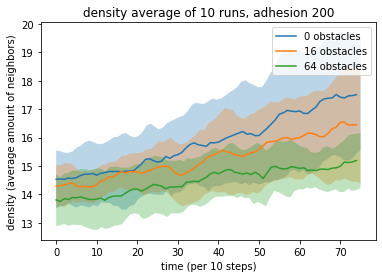

In [94]:
fig = plt.figure(figsize = (12, 10))
plt.plot(density_all1, label='0 obstacles')
plt.fill_between(np.linspace(0, 75, 75), density_all1-density_std1, density_all1+density_std1, alpha = 0.3)
plt.plot(density_all2, label='16 obstacles')
plt.fill_between(np.linspace(0, 75, 75), density_all2-density_std2, density_all2+density_std2, alpha = 0.3)
plt.plot(density_all3, label='64 obstacles')
plt.fill_between(np.linspace(0, 75, 75), density_all3-density_std3, density_all3+density_std3, alpha = 0.3)
plt.title('density average of 10 runs, adhesion 200')
plt.xlabel('time (per 10 steps)')
plt.ylabel('density (average amount of neighbors)')
plt.legend()